34. LaTeX Markdown and Generating Data
with Numpy
15min

### Notebook Imports and Packages
## Notebook Imports and Packages
# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data 
x_1 = np.linspace(start = -3, stop = 3, num = 100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [4]:
# Make Data 
x_1 = np.linspace(start = -3, stop = 3, num = 10)
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

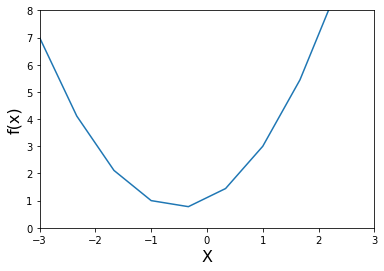

In [5]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1))
plt.show()

35. Understanding the Power Rule & Creating Charts with Subplots 15min

# slope and Derivatives 
challenge: Create a python function for the derivative of f(x) called df(x)

In [6]:
def df(x):
    return 2*x + 1

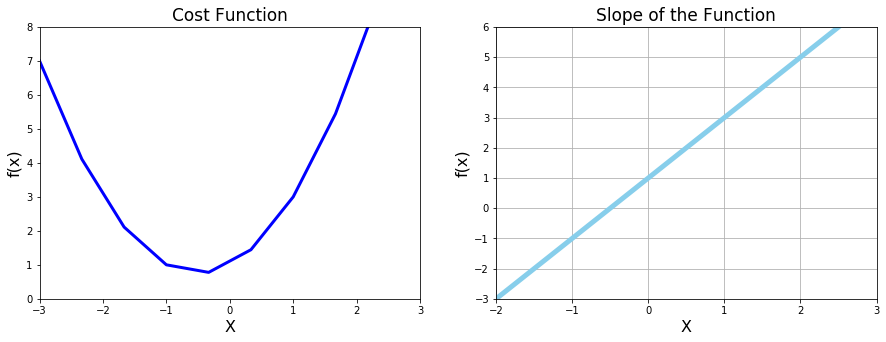

In [7]:
# Plot function and derivative side by side

plt.figure(figsize = [15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)


#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5)


plt.show()

36. [Python] - Loops and the Gradient Descent Algorithm 37min

## Python Loops and Gradient Descent

In [8]:
# Python For Loop

for n in range(5):
    print('Hello World', n)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [10]:
# Python while loop

counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I Come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I Come!


In [20]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  61
Local minimum occurs at: -0.4999965672099885
Slope or df(x) value at this point is:  6.8655800230521535e-06
f(x) value or cost at this point is:  0.750000000011784


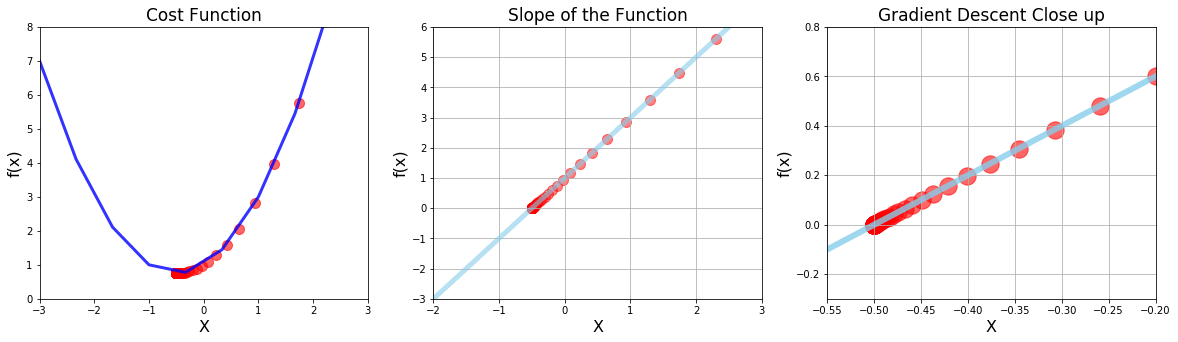

In [30]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize = [20, 5])

#1 Chart: Cost Function
plt.subplot(1, 3, 1) # rows, columns, index

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)


#2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

#2 Chart: Derivative (close up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent Close up', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()